# **Linear Regression on Housing Data**
### **Using Square Footage vs. Median House Price**
This notebook explores the relationship between house **square footage** and **median house price** using a **synthetic dataset**.

## **Key Steps:**
- Generate synthetic housing data
- Check linear regression assumptions
- Train a regression model
- Evaluate its performance
- Visualize results

## **1. Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

## **2. Generate and Preprocess Synthetic Data**

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random square footage values (800 - 4000 sqft)
square_footage = np.random.randint(800, 4000, 500)

# Generate house prices with some randomness (base price + noise)
house_prices = 50000 + 150 * square_footage + np.random.normal(0, 50000, 500)

# Create a DataFrame
df = pd.DataFrame({
    'SquareFootage': square_footage,
    'MedianHousePrice': house_prices
})

# Display dataset preview
df.head()

,SquareFootage,MedianHousePrice
0,3974,734372.712014
1,1660,319249.085548
2,2094,301055.802283
3,1930,385393.097353
4,1895,440357.809851


## **3. Checking Assumptions for Linear Regression**

### **3.1 Linearity Check**
We plot a scatterplot of **Square Footage vs. Median House Price** to check if the relationship appears linear.

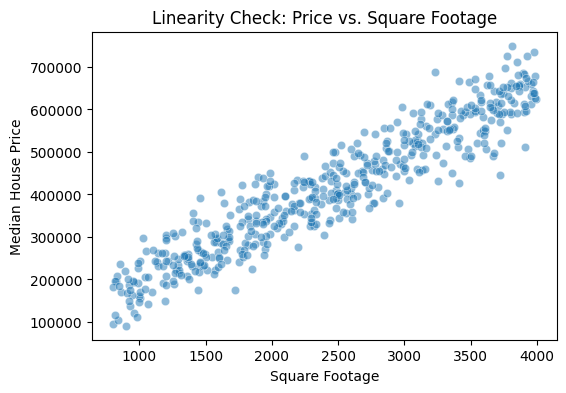

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['SquareFootage'], y=df['MedianHousePrice'], alpha=0.5)
plt.xlabel('Square Footage')
plt.ylabel('Median House Price')
plt.title('Linearity Check: Price vs. Square Footage')
plt.show()

Linearity Check

What the scatterplot shows:
- A linear trend should be visible between square footage (X-axis) and median house price (Y-axis).
- If the points form a roughly straight pattern, the linearity assumption holds.
- If the points show curvature, a nonlinear model (like polynomial regression) may be more appropriate.

### **3.2 Normality of Residuals**
We check whether residuals follow a normal distribution using a histogram and Q-Q plot.

Why do we check this?
- In linear regression, normality of residuals ensures that statistical tests on coefficients (e.g., t-tests, confidence intervals) are valid.
- If residuals are not normally distributed, hypothesis tests on regression coefficients may be misleading or invalid.
- This is especially important for small datasets where normality assumptions matter more.

### Train & Test Model

First we need to actually split the data and fit the model

In [4]:
# Split data
X = df[['SquareFootage']]
y = df['MedianHousePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Then we can look at the normality of the residuals

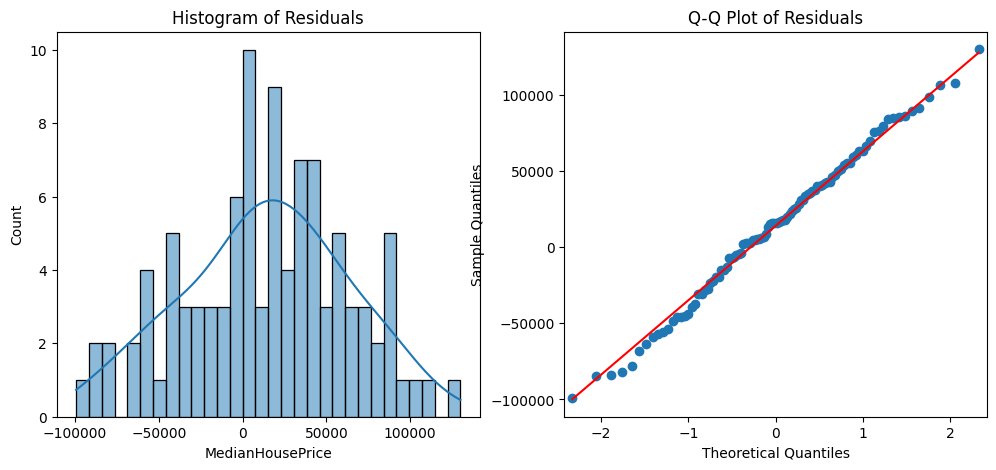

In [5]:
# Generate residuals
residuals = y_test - y_pred

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')
plt.show()

Histogram of residuals:
- The histogram should look approximately bell-shaped.
- If it does, the residuals are normally distributed, which is important for valid statistical inference.
- If the histogram is skewed or has multiple peaks, transformations might be needed.

Q-Q Plot (Quantile-Quantile Plot):
- If residuals follow a normal distribution, they should fall along the diagonal line.
- If points deviate significantly, residuals are not normally distributed, potentially affecting inference.

### **3.3 Homoskedasticity Check**
Residuals should have constant variance. We check this by plotting residuals vs. predicted values.

Why do we check this?
- Homoskedasticity ensures that the model’s error (variance of residuals) is consistent across all predicted values.
- If variance increases or decreases systematically, the model may be biased, and confidence intervals for coefficients may be unreliable.
- Violations suggest that transformations (e.g., log transformations) or robust regression techniques should be considered.

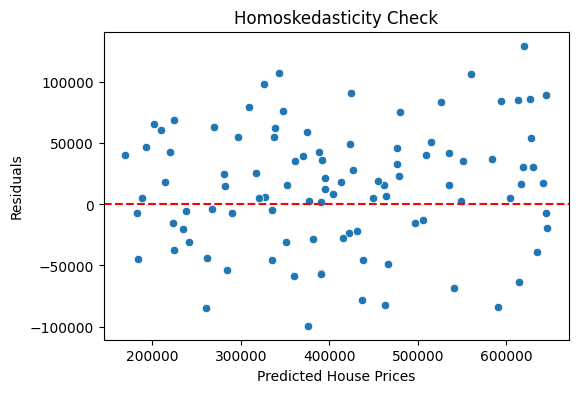

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Homoskedasticity Check')
plt.show()

Residuals vs. Predicted Prices scatterplot:
- If residuals are randomly spread with no clear pattern, homoskedasticity holds.
- If residuals show a cone shape (wider spread at one end), the data is heteroskedastic, which may require transformations like log transformations.

### **3.4 Independence of Residuals Check**

Why do we check this?
- Residuals should be independent to prevent misleading patterns in predictions.
- If residuals are correlated (autocorrelation), this means the model is missing a pattern in the data, often seen in time series data.
- Violations indicate that a time-series model (like ARIMA) or additional predictors might be necessary.

In [7]:
# Independence of Residuals Check using Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat:.4f}')

Durbin-Watson Statistic: 2.2613


Durbin-Watson Statistic:
- A value close to 2.0 suggests no autocorrelation (ideal for linear regression).
- Values closer to 0 suggest positive autocorrelation (successive residuals are similar).
- Values closer to 4 suggest negative autocorrelation.

Output Interpretation:
- The computed Durbin-Watson statistic = 2.2613, which is close to 2, suggesting that residuals are independent.

In [8]:
# Compute R^2
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2:.4f}')

R-Squared: 0.8827


R² = 0.8827
- This means that 88.27% of the variance in median house price can be explained by square footage.
- A high R² indicates a good fit, but it does not guarantee causation or correctness.
- Important: A high R² does not necessarily mean the model is the best. We must check assumptions to confirm validity.

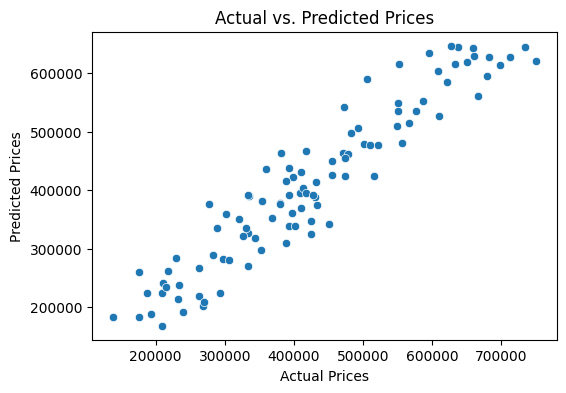

In [9]:
# Visualizing Actual vs. Predicted Prices
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

Scatterplot Analysis:
- Points should align close to the diagonal if the model makes good predictions.
- Large deviations from the diagonal indicate the model is making large errors for certain predictions.